This code will create a file with all the linear regression output
The output files can then be use to create a qqplot based on genomewide data vs by chr
Just change the Tissue path to obtain the results

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

Frames=[pd.read_csv('/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/Skin-SunExposed/chr1/Lin_Reg_Out',sep='\t')]
for x in range(2,23):
    LN='/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/Skin-SunExposed/chr'+str(x)+'/Lin_Reg_Out'
    frame1=pd.read_csv(LN, sep='\t')
    Frames.append(frame1)
#    print('Chr',x,'    ',frame1.shape)
Results=pd.concat(Frames)
print('\n All Chrms ','   ', Results.shape)
Results.to_csv('/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/Skin-SunExposed/Lin_Reg_Out', sep='\t', header=True)
print('Continuing...')

Frames=[pd.read_csv('/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/Skin-SunExposed/chr1/Lin_Reg_Out_perm',sep='\t')]
for x in range(2,23):
    LN='/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/Skin-SunExposed/chr'+str(x)+'/Lin_Reg_Out_perm'
    frame1=pd.read_csv(LN, sep='\t')
    Frames.append(frame1)
#    print('Chr',x,'    ',frame1.shape)
Results=pd.concat(Frames)
print('\n All Chrms ','   ', Results.shape)
Results.to_csv('/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/Skin-SunExposed/Lin_Reg_Out_perm', sep='\t', header=True)

print('THE END')



 All Chrms      (19659, 12)
Continuing...

 All Chrms      (19659, 12)
THE END


This code is targeted at comparing the intercept from previous and current analysis
I will start with only chr1

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

##Get IDs
##Get old estr data #V1 V2 V3 V4 ... V17
#oldestr = pd.read_csv('/storage/szfeupe/Runs/GTEx_estr/2016_estrs_table.csv',sep=',')
#chr1str = oldestr #.loc[oldestr['chrom'].isin(['chr6'])]
chr1str = pd.read_csv('/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/Adipose-Subcutaneous/Lin_Reg_Out', sep='\t')
##G1 = chr1str.loc[chr1str['gene'].isin(['ENSG00000188976'])]       ##Testing old

##Get current estr data
newestr = pd.read_csv('/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/WholeBlood/Lin_Reg_Out',sep='\t')
##newestr = newestr.sort(columns='str.start', ascending=True)
##print(newestr)
#G2 = [x.split('.')[0] for x in list(newestr['gene'])]           ##Reformat gene name without version
#newestr['gene']=G2

##only select gene present in both dataset
chr1str1 = newestr.loc[newestr['gene'].isin(chr1str['gene'])]     #New data in old
chr1str0 = chr1str.loc[chr1str['gene'].isin(chr1str1['gene'])]    #Old data in new
##G2 = chr1str1.loc[chr1str1['gene'].isin(['ENSG00000188976'])]     ##Testing new
print(len(chr1str0), ' old\t',len(chr1str1),' new' )
##adjusting tart position in old data
#chr1str0['str.start'] = chr1str0['str.start']-1  #Adjusting hipstr n lobstr POS

#Comparing
#X_o = chr1str0.loc[chr1str0['str.start'].isin(chr1str1['str.start'])]
#X_o = X_o.sort(columns='gene', ascending=True)

#print(len(X_o))
#X_o = X_o[X_o['signif.estr'] & X_o['best_str']]
#X_o = X_o[X_o['p.wald']<0.001]


#X_n = chr1str1.loc[chr1str1['str.start'].isin(X_o['str.start'])] #& chr1str1.loc[chr1str1['gene'].isin(X_o['gene'])] ]
#X_n = X_n.sort(columns='gene', ascending=True)
#print(len(X_o), '--------',len(X_n))







#Select 3 col of interest 
Int=['gene', 'str.start', 'beta','p.wald']
G0= chr1str0.loc[:,Int]      #X_o.loc[:,Int]
GN= chr1str1.loc[:,Int]      #X_n.loc[:,Int]
#print(len(X_o))
#print(G0)

19353  old	 20045  new


In [12]:
#G0=  G0[G0['p.wald']<0.001]
GN=  GN[GN['p.wald']<0.001]
newrows={x['gene']+'-'+str(int(x['str.start'])) : x['beta'] for y,x in GN.iterrows()}
oldrows={x['gene']+'-'+str(int(x['str.start'])): x['beta'] for y,x in G0.iterrows()}
print(len(newrows.keys()), '\t',len(oldrows.keys()))
Key = [x for x in newrows.keys() if x in oldrows.keys()]
print (len(Key))
Xn = [newrows[x] for x in Key]
Yo = [oldrows[x] for x in Key]
#print(GN)

104 	 19353
101


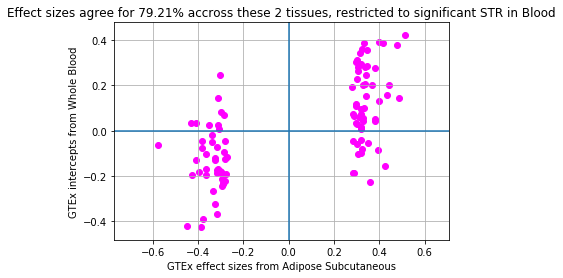

In [14]:
#WB vs nature paper on chr6
plt.scatter(Xn,Yo,color='magenta',marker='o',)
plt.xlim(-0.7, 0.7)
plt.ylim(-0.7, 0.7)
plt.ylabel('GTEx intercepts from Whole Blood')
plt.xlabel('GTEx effect sizes from Adipose Subcutaneous')
plt.title('Effect sizes agree for 79.21% accross these 2 tissues, restricted to significant STR in Blood')
plt.axis('equal')
plt.axhline(y=0)
plt.axvline(x=0)
plt.grid()
plt.show()

In [13]:
N=0; M=0; O=0; P=0
for i in range(len(Xn)):
    if (Xn[i]<0 and Yo[i]<0):
        N=N+1
    elif (Xn[i]>0 and Yo[i]>0):
        M=M+1
    elif (Xn[i]>0 and Yo[i]<0):
        O=O+1
    else:
        P=P+1
        
print(N,' & ', M, '\t vs \t', O,' & ', P, ' -->  ',(N+M)*100/(M+N+P+O)) 

37  &  43 	 vs 	 12  &  9  -->   79.20792079207921


In [ ]:
ENSG00000071655.13
ENSG00000127540.7